![rf1](./img/rf1.webp)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 33.1 MB/s eta 0:00:00


![rf2](./img/rf2.webp)

[figure: Random forest classification algorithm](https://towardsdatascience.com/understanding-random-forest-58381e0602d2)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio as rio

from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

ModuleNotFoundError: No module named 'rasterio'

In [ ]:
ds = rio.open(r'/content/drive/MyDrive/RcNN/X_train.tif')
arr = ds.read()
arr = np.moveaxis(arr, 0, -1)
arr = np.where(np.isnan(arr), 0, arr)

nrow_train = arr.shape[0]
ncol_train = arr.shape[1]

X_train = np.reshape(arr, (arr.shape[0] * arr.shape[1], arr.shape[2]))
X_train.shape

(6969162, 4)

In [ ]:
ds = rio.open(r'/content/drive/MyDrive/RcNN/y_train.tif')
arr=ds.read()
arr = np.moveaxis(arr, 0, -1)
arr = np.where(arr == np.nan, 0, arr)
y_train = arr.reshape(-1)
y_train.shape

(6969162,)

In [ ]:
ds = rio.open(r'/content/drive/MyDrive/RcNN/X_test.tif')
arr = ds.read()
arr = np.moveaxis(arr, 0, -1)
arr = np.where(np.isnan(arr), 0, arr)

nrow_test = arr[0]
ncol_test = arr[1]

X_test = np.reshape(arr, (arr.shape[0] * arr.shape[1], arr.shape[2]))
X_test.shape

(4207593, 4)

In [ ]:
ds = rio.open(r'/content/drive/MyDrive/RcNN/y_test.tif')
arr = ds.read()
arr = np.moveaxis(arr, 0, -1)
arr = np.where(np.isnan(arr), 0, arr)
y_test = arr.reshape(-1)
y_test.shape

(4207593,)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter grid
param_distributions = {
    'n_estimators': np.arange(50, 225, 25),
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the RandomizedSearchCV instance
random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    param_distributions=param_distributions,
    n_iter=10,  # Number of different combinations to test
    scoring='accuracy',  # Evaluation metric
    cv=3,  # Number of cross-validation folds
    random_state=42
)

# Fit the RandomizedSearchCV
random_search.fit(X_train, y_train)

# Predict using the best model
y_pred = random_search.best_estimator_.predict(X_test)

# Evaluate the best model
print(classification_report(y_test, y_pred))



NameError: name 'RandomForestClassifier' is not defined

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Define your own set of hyperparameters for each case
param_list = [
    {'n_estimators': 150, 'max_depth': 30, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2'},
]

# Iterate through each set of hyperparameters
for i, params in enumerate(param_list):
    # Define the RandomForestClassifier with the current set of parameters
    rfc = RandomForestClassifier(random_state=42, n_jobs=-1, **params)

    # Fit the model to the training data
    rfc.fit(X_train, y_train)

    # Predict using the trained model
    y_pred = rfc.predict(X_test)

    # Evaluate the model
    print(f"Case {i + 1}:")
    print("Parameters:", params)
    print(classification_report(y_test, y_pred))
    print("\n")

Case 1:
Parameters: {'n_estimators': 150, 'max_depth': 30, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'log2'}
              precision    recall  f1-score   support

           0       0.88      1.00      0.94   3682263
           1       0.87      0.06      0.11    525330

    accuracy                           0.88   4207593
   macro avg       0.87      0.53      0.52   4207593
weighted avg       0.88      0.88      0.83   4207593





In [ ]:
                   #rfc = RandomForestClassifier(n_estimators=100, random_state=42, verbose=3, n_jobs=-1)
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Define the RandomForestClassifier
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100],  # Number of trees in the forest
    'max_depth': [10],  # Maximum depth of the trees
    'min_samples_split': [2],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1],  # Minimum samples required to be at a leaf node
    'max_features': ['auto']  # Number of features to consider at each split
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, scoring='accuracy', verbose=3)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predict using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 1/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.965 total time=23.0min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 2/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.976 total time=23.0min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 3/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.980 total time=23.7min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 4/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.986 total time=22.9min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV 5/5] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.972 total time=24.2min


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


              precision    recall  f1-score   support

           0       0.88      1.00      0.93   3682263
           1       0.91      0.02      0.04    525330

    accuracy                           0.88   4207593
   macro avg       0.90      0.51      0.49   4207593
weighted avg       0.88      0.88      0.82   4207593



In [ ]:
rfc.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  9.9min


building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 34.7min finished


RandomForestClassifier(n_jobs=-1, random_state=42, verbose=3)

In [ ]:
y_pred = rfc.predict(X_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:   35.6s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:  2.0min finished


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94   3682263
           1       0.82      0.06      0.12    525330

    accuracy                           0.88   4207593
   macro avg       0.85      0.53      0.53   4207593
weighted avg       0.87      0.88      0.83   4207593



In [ ]:
print(len(nrow_test)* len(ncol_test))

6295081


In [ ]:
import numpy as np

# Assuming y_pred, y_test, and X_test are numpy arrays
y_pred_size = len(y_pred)  # Total size of y_pred
y_test_size = len(y_test)  # Total size of y_test
X_test_size = len(X_test)  # Total size of X_test

# Calculate the desired shapes based on your requirements
desired_shape_y_pred = int(4207593**0.5)
desired_shape_y_test = 224
desired_shape_X_test = (224, 224, 4)

# Check if the shapes match the total size of each array
if y_pred_size == desired_shape_y_pred ** 2:
    # Reshape y_pred if it matches the required size
    y_pred_reshaped = y_pred.reshape(desired_shape_y_pred, desired_shape_y_pred)
else:
    print("y_pred cannot be reshaped to the desired shape.")

if y_test_size == desired_shape_y_test ** 2:
    # Reshape y_test if it matches the required size
    y_test_reshaped = y_test.reshape(desired_shape_y_test, desired_shape_y_test)
else:
    print("y_test cannot be reshaped to the desired shape.")

if X_test_size == desired_shape_X_test[0] * desired_shape_X_test[1] * desired_shape_X_test[2]:
    # Reshape X_test if it matches the required size
    X_test_reshaped = X_test.reshape(desired_shape_X_test)
else:
    print("X_test cannot be reshaped to the desired shape.")

# Print the reshaped array shapes
if 'y_pred_reshaped' in locals():
    print("y_pred_reshaped shape:", y_pred_reshaped.shape)

if 'y_test_reshaped' in locals():
    print("y_test_reshaped shape:", y_test_reshaped.shape)

if 'X_test_reshaped' in locals():
    print("X_test_reshaped shape:", X_test_reshaped.shape)


y_pred cannot be reshaped to the desired shape.
y_test cannot be reshaped to the desired shape.
X_test cannot be reshaped to the desired shape.


In [ ]:
import numpy as np

# Assuming y_pred, y_test, and X_test are numpy arrays

# Check the type of nrow_test
print("Type of nrow_test before conversion:", type(nrow_test))

# If nrow_test is an array, extract the first value or an appropriate value and convert it to an integer
if isinstance(nrow_test, np.ndarray):
    nrow_test = int(nrow_test[0])
else:
    nrow_test = int(nrow_test)

print("nrow_test:", nrow_test)

# Similarly, check and convert ncol_test
print("Type of ncol_test before conversion:", type(ncol_test))

if isinstance(ncol_test, np.ndarray):
    ncol_test = int(ncol_test[0])
else:
    ncol_test = int(ncol_test)

print("ncol_test:", ncol_test)

# Continue with reshaping if `nrow_test` and `ncol_test` have been successfully converted
# Calculate the total size of each array
y_pred_size = len(y_pred)
y_test_size = len(y_test)
X_test_size = len(X_test)

# Check if the shapes match the total size of each array
if y_pred_size == nrow_test * ncol_test:
    # Reshape y_pred if it matches the required size
    y_pred_reshaped = y_pred.reshape(nrow_test, ncol_test)
else:
    print("y_pred cannot be reshaped to the desired shape.")

if y_test_size == nrow_test * ncol_test:
    # Reshape y_test if it matches the required size
    y_test_reshaped = y_test.reshape(nrow_test, ncol_test)
else:
    print("y_test cannot be reshaped to the desired shape.")

if X_test_size == nrow_test * ncol_test * 4:
    # Reshape X_test if it matches the required size
    X_test_reshaped = X_test.reshape(nrow_test, ncol_test, 4)
else:
    print("X_test cannot be reshaped to the desired shape.")

# Print the reshaped array shapes if available
if 'y_pred_reshaped' in locals():
    print("y_pred_reshaped shape:", y_pred_reshaped.shape)

if 'y_test_reshaped' in locals():
    print("y_test_reshaped shape:", y_test_reshaped.shape)

if 'X_test_reshaped' in locals():
    print("X_test_reshaped shape:", X_test_reshaped.shape)




Type of nrow_test before conversion: <class 'numpy.ndarray'>


TypeError: only length-1 arrays can be converted to Python scalars

NameError: name 'X_test_reshaped' is not defined

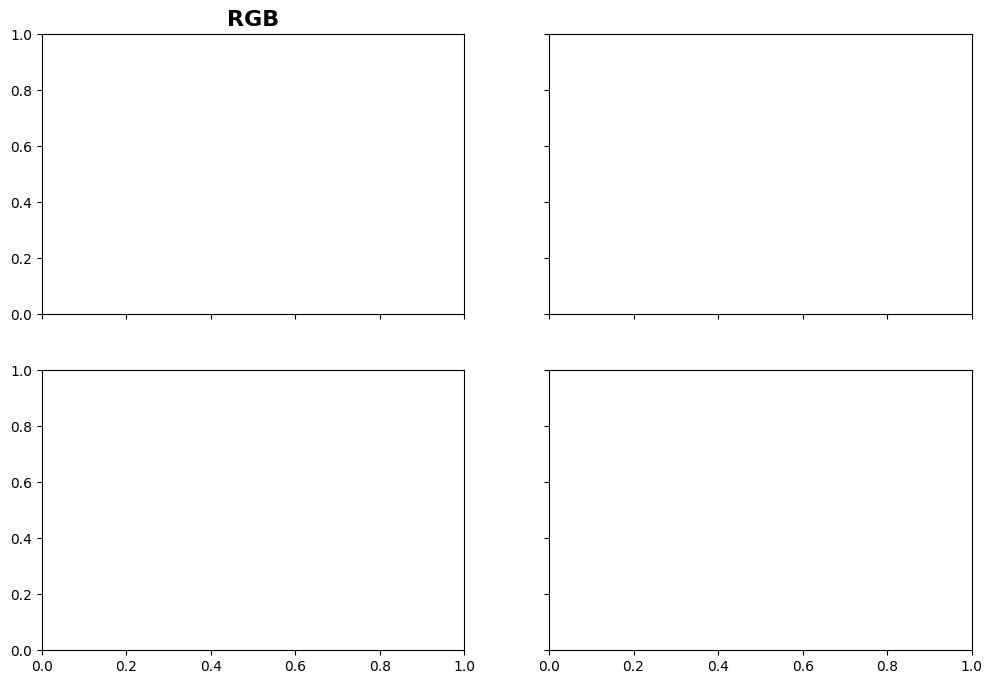

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(12,8))
ax1, ax2, ax3, ax4 = axes.flatten()

ax1.set_title("RGB", fontweight='bold', fontsize='16')
ax1.imshow(X_test_reshaped[:,:,:3])

ax2.set_title("NRI", fontweight='bold', fontsize='16')
ax2.imshow(X_test_reshaped[:,:,3])

ax3.set_title("Ground Truth", fontweight='bold', fontsize='16')
ax3.imshow(y_test_reshaped[:,:])

ax4.set_title("Predicted", fontweight='bold', fontsize='16')
ax4.imshow(y_pred_reshaped[:,:])

plt.tight_layout()

plt.show()